In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
train = pd.read_csv("/home/vivek/Documents/Datasets/Loan Prediction/train.csv")

In [3]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Describes where houses are belongs to

In [5]:
# Frequency table
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### For applicant income, majority of part is in between 2000 - 10000 and we also have some outliers

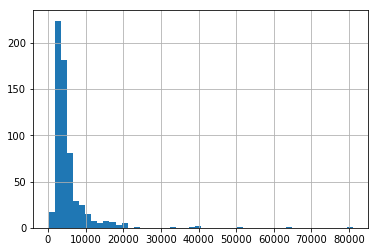

In [6]:
# Plot the histogram for Applicant Income
%matplotlib inline
train['ApplicantIncome'].hist(bins=50)

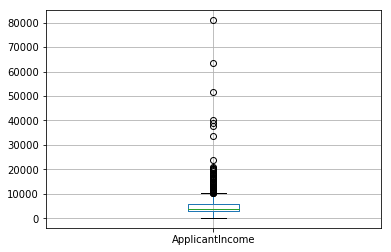

In [7]:
# Box plot
train.boxplot (column = 'ApplicantIncome')

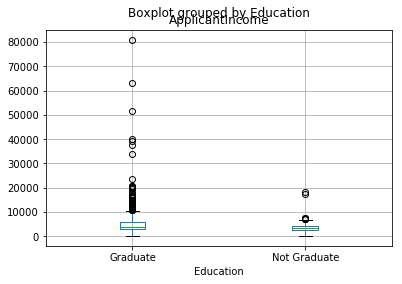

In [8]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')

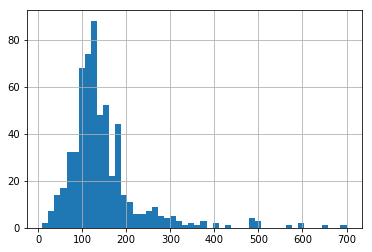

In [9]:
train['LoanAmount'].hist(bins=50)

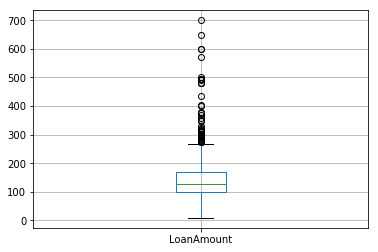

In [10]:
train.boxplot(column = 'LoanAmount')

#### Below shows us how many applicant has credit history

In [11]:
temp1 = train['Credit_History'].value_counts(ascending = True)
print ("Frequency Table for Credit History: ")
print (temp1)

Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64


#### Probability of getting Loan according to credit history

In [12]:
temp2 = train.pivot_table(values='Loan_Status', index = ['Credit_History'],
                      aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())

print ('Probability of getting loan for each Credit History class:')
print (temp2)

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


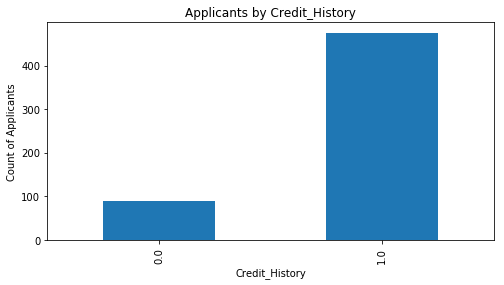

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
plt.xlabel('Credit_History')
plt.ylabel('Count of Applicants')
plt.title("Applicants by Credit_History")
temp1.plot(kind = 'bar')

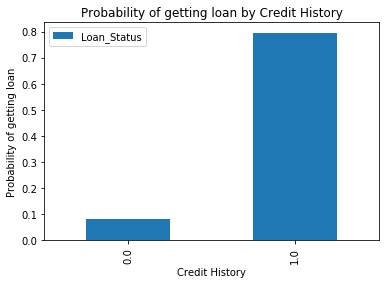

In [14]:
temp2.plot(kind = 'bar')
plt.xlabel('Credit History')
plt.ylabel('Probability of getting loan')
plt.title("Probability of getting loan by Credit History")

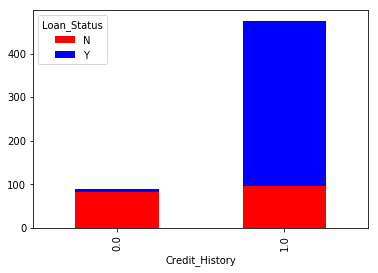

In [15]:
temp3 = pd.crosstab(train['Credit_History'],train['Loan_Status'])
temp3.plot(kind = 'bar', stacked = True, color = ['red','blue'], grid = False)

#### How many are self_employed (have there own business)

In [16]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### Here we have maximum number of applicant are not self employed so we fill that column with most common answer

In [17]:
train['Self_Employed'].fillna('No',inplace=True)

#### Now, we will check average value of how much loan they are getting with/without graduation and with/without selfemployed 

In [18]:
table = train.pivot_table(values="LoanAmount", index = 'Self_Employed',
                         columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [19]:
def table_values(x):
    return table.loc[x['Self_Employed'],x['Education']]

#### Is ther any NULL values in Loan amount, if there is any we have to fill with above mentioned average values

In [20]:
train["LoanAmount"].isnull().sum()

22

In [21]:
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].
                          apply(table_values, axis=1), inplace=True)

#### Convert Loan amount and Total Income values into their log values so it will normalize LoanAmount because of large skewness in values

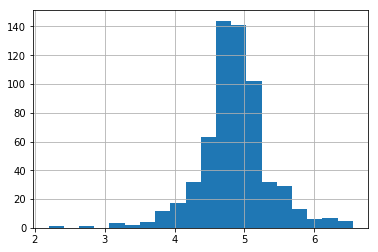

In [22]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

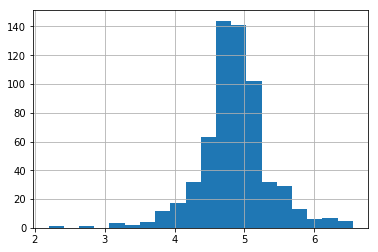

In [23]:
# Now we will combine the applicant income with its co-applicant income
train['TotalIncome'] = train["ApplicantIncome"] + train["CoapplicantIncome"]
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20)

#### Is there any missing values in Married, Gender,Credit History, Loan Amount term and Depedents columns, we will replace it with most common values

In [24]:
train['Married'].isnull().sum()

3

In [25]:
train['Married'].fillna('Yes', inplace = True)

In [26]:
train['Gender'].isnull().sum()

13

In [27]:
train['Gender'].fillna('Male',inplace = True)

In [28]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
train['Dependents'].fillna('0',inplace = True)

In [30]:
train['Credit_History'].replace(1, 1.0);

In [31]:
train['Credit_History'].fillna('1.0',inplace = True)

In [32]:
train['Loan_Amount_Term'].isnull().sum()

14

In [33]:
train['Loan_Amount_Term'].fillna('360.0',inplace = True)

In [34]:
train = train.drop(['LoanAmount'], axis = 1)

In [35]:
train = train.drop(['TotalIncome'], axis = 1)

In [36]:
# We have some of our data in categorical variables and we need to convert it into numerica values

from sklearn.preprocessing import LabelEncoder

var_mod =["Gender","Married",'Dependents',"Education","Self_Employed",
         'Property_Area']

le = LabelEncoder()

for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [37]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
Loan_Status           object
LoanAmount_log       float64
TotalIncome_log      float64
dtype: object

In [38]:
train = train.drop(['Loan_ID'], axis = 1);
train = train.drop(['CoapplicantIncome'], axis = 1);

In [39]:
x_train = train.drop(['Loan_Status'], axis = 1)
y_train = train['Loan_Status']

In [40]:
x_train.shape, y_train.shape

((614, 11), (614,))

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.cross_validation import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

/home/vivek/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Logistic Regression

In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

80.939999999999998

### Correlation according to which feature contributes most in classification

In [43]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending = False)

,Feature,Correlation
7,Property_Area,3.092629
1,Dependents,0.499297
2,Education,0.023402
8,Loan_Status,0.023283
4,ApplicantIncome,0.000148
5,Loan_Amount_Term,0.000009
6,Credit_History,-0.000719
10,TotalIncome_log,-0.038076
0,Married,-0.051361
9,LoanAmount_log,-0.313364


### Support Vector Machines

In [44]:
svc = SVC()
svc.fit(x_train, y_train)
acc_svc = round(svc.score(x_train,y_train) * 100,2)
acc_svc

95.280000000000001

### K-Nearest Neighbors 

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
acc_knn = round(knn.score(x_train,y_train) * 100, 2)
acc_knn

80.620000000000005

### Gaussian Naive Bayes

In [46]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_gaussian = round(gaussian.score(x_train,y_train)*100,2)
acc_gaussian

80.459999999999994

### Perceptron

In [47]:
perceptron = Perceptron()
perceptron.fit(x_train,y_train)
acc_perceptron = round(perceptron.score(x_train,y_train)*100,2)
acc_perceptron

31.27

### Decision Tree

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
acc_decision_tree =  round(decision_tree.score(x_train,y_train)*100,2)
acc_decision_tree

100.0

### Random Forest

In [49]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train)*100,2)
acc_random_forest

100.0

### Comparision of all the classification models we described above

In [50]:
models = pd.DataFrame({'Model': ['Suppoer Vector Machines', 'KNN', 'Logistic Regression',
                                'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
                      'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian,
                               acc_perceptron, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
0,Suppoer Vector Machines,95.28
2,Logistic Regression,80.94
1,KNN,80.62
4,Naive Bayes,80.46
5,Perceptron,31.27
